## Telecom Churn Case Study Assignment

### Problem Statement

In the Telecom industry, Customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the communications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
 

**To reduce customer churn, companies need to predict which customers are at high risk of churn.**

### Bussiness Objective

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

### Importing necessary libraries

In [3]:
#Basic computaion & preprocessing
import pandas as pd
import numpy as np

#libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns

#Pandas expand rows dependencies
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 400)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_colwidth', 200)

#Matplotlib magic function
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

#Ignore warning
import warnings
warnings.filterwarnings('ignore')
# To build the model
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# To Scale the data
from sklearn.preprocessing import MinMaxScaler

In [4]:
#Read dataset
df = pd.read_csv("telecom_churn_data.csv")
#First five rows
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [5]:
#rows and columns in dataset
df.shape

(99999, 226)

In [6]:
#Data-type of dataset
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   mobile_number             99999 non-null  int64  
 1   circle_id                 99999 non-null  int64  
 2   loc_og_t2o_mou            98981 non-null  float64
 3   std_og_t2o_mou            98981 non-null  float64
 4   loc_ic_t2o_mou            98981 non-null  float64
 5   last_date_of_month_6      99999 non-null  object 
 6   last_date_of_month_7      99398 non-null  object 
 7   last_date_of_month_8      98899 non-null  object 
 8   last_date_of_month_9      98340 non-null  object 
 9   arpu_6                    99999 non-null  float64
 10  arpu_7                    99999 non-null  float64
 11  arpu_8                    99999 non-null  float64
 12  arpu_9                    99999 non-null  float64
 13  onnet_mou_6               96062 non-null  float64
 14  onnet

In [7]:
#Description of the data
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,99999.00,99999.00,98981.00,98981.00,98981.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,99999.00,99999.00,99999.00,99999.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.00,94621.00,92254.00,96062.00,96140.

- unique mobile numbers

- There are some columns with no variance -
circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9 
- We will deal with above columns under Data Cleaning.

#### Deriving New Features : 
"total recharge amount(data+call)", "Average recharge amount of June and July month", "churn"

In [8]:
#Find columns with recharge detail
tot_rech_cols = [col for col in df.columns if 'total_rec' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [9]:
#Derive Total Data Recharge Amounts
df['total_rech_amt_data_6'] = df['total_rech_data_6']*df['av_rech_amt_data_6']
df['total_rech_amt_data_7'] = df['total_rech_data_7']*df['av_rech_amt_data_7']
df['total_rech_amt_data_8'] = df['total_rech_data_8']*df['av_rech_amt_data_8']

In [10]:
#Shape of Data
df.shape

(99999, 229)

In [11]:
# Dropping total_rech_data and av_rech_amt_data_ columns as we have derived new feature out of them and they are not needed for our analysis further
drop_cols = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df.drop(drop_cols, axis=1, inplace=True)

In [12]:
#Checking Shape of Data after dropping
df.shape

(99999, 221)

In [13]:
#Finding Average of Recharge Amount for 6th and 7th Month
av_rech_amt_6_7 = (df["total_rech_amt_6"].fillna(0) + df["total_rech_amt_data_6"].fillna(0) + 
                     df["total_rech_amt_7"].fillna(0) + df["total_rech_amt_data_7"].fillna(0))/2.0

In [14]:
#Checking length
len(av_rech_amt_6_7)

99999

In [15]:
#Avg recharge of 6th and 7th Months
av_rech_amt_6_7.head()

0   559.00
1   306.00
2   241.50
3   270.00
4   301.00
dtype: float64

In [16]:
#70th Percentile of Avg Recharge Amount
Percentile_70_6_7 = np.percentile(av_rech_amt_6_7, 70.0)
print('70th percentile of 6th and 7th months avg recharge amount is: ', Percentile_70_6_7)

70th percentile of 6th and 7th months avg recharge amount is:  478.0


#### Filtering High Value Customers

In [17]:
#Filtering high value customers (Top 30% Customers)
hvc_data = df[av_rech_amt_6_7 >= Percentile_70_6_7]

In [18]:
#check
hvc_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,2

In [19]:
hvc_data.shape

(30001, 221)

### Data Cleaning 

In [20]:
# Drop date columns

#Initializing cols
col = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
      'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
#Dropping columns
hvc_data = hvc_data.drop(col, axis=1)


In [21]:
#check
hvc_data.shape

(30001, 213)

#### Missing Values

In [22]:
#check missing value percentage
(100*(hvc_data.isnull().sum()/len(hvc_data))).sort_values(ascending=False).head(40)

count_rech_3g_9            49.27
count_rech_2g_9            49.27
arpu_3g_9                  49.27
arpu_2g_9                  49.27
fb_user_9                  49.27
night_pck_user_9           49.27
max_rech_data_9            49.27
date_of_last_rech_data_9   49.27
date_of_last_rech_data_8   46.83
count_rech_3g_8            46.83
arpu_3g_8                  46.83
arpu_2g_8                  46.83
night_pck_user_8           46.83
count_rech_2g_8            46.83
total_rech_amt_data_8      46.83
max_rech_data_8            46.83
fb_user_8                  46.83
night_pck_user_6           44.15
date_of_last_rech_data_6   44.15
total_rech_amt_data_6      44.15
max_rech_data_6            44.15
count_rech_3g_6            44.15
arpu_3g_6                  44.15
count_rech_2g_6            44.15
arpu_2g_6                  44.15
fb_user_6                  44.15
total_rech_amt_data_7      43.15
count_rech_3g_7            43.15
arpu_3g_7                  43.15
arpu_2g_7                  43.15
night_pck_

As we can see, Here few columns shows missing values greater than 40%
Lets drop column having missing value greater than 40%, as it makes no sense retaining those columns

In [23]:
#% of missing values can be calculated by mean of NAs in each column.
cols = hvc_data.columns[(hvc_data.isnull().mean()>0.4)]
#Dropping columns
hvc_data = hvc_data.drop(cols, axis=1)

In [24]:
#check
hvc_data.shape

(30001, 178)

In [25]:
#Check missing values after dropping
(100*(hvc_data.isnull().sum()/len(hvc_data))).sort_values(ascending=False).head(40)

loc_ic_t2m_mou_9   6.34
loc_og_t2m_mou_9   6.34
std_ic_t2t_mou_9   6.34
loc_og_t2t_mou_9   6.34
std_ic_t2f_mou_9   6.34
loc_ic_mou_9       6.34
roam_og_mou_9      6.34
loc_ic_t2f_mou_9   6.34
isd_ic_mou_9       6.34
std_og_t2t_mou_9   6.34
roam_ic_mou_9      6.34
loc_og_t2f_mou_9   6.34
loc_ic_t2t_mou_9   6.34
std_ic_t2o_mou_9   6.34
offnet_mou_9       6.34
std_ic_mou_9       6.34
std_og_t2m_mou_9   6.34
loc_og_mou_9       6.34
ic_others_9        6.34
std_og_t2f_mou_9   6.34
spl_ic_mou_9       6.34
std_og_t2c_mou_9   6.34
og_others_9        6.34
std_og_mou_9       6.34
isd_og_mou_9       6.34
loc_og_t2c_mou_9   6.34
spl_og_mou_9       6.34
onnet_mou_9        6.34
std_ic_t2m_mou_9   6.34
spl_ic_mou_8       3.91
std_ic_t2o_mou_8   3.91
std_og_t2t_mou_8   3.91
std_ic_t2f_mou_8   3.91
loc_ic_t2f_mou_8   3.91
std_ic_t2m_mou_8   3.91
std_ic_t2t_mou_8   3.91
loc_ic_mou_8       3.91
loc_ic_t2m_mou_8   3.91
loc_ic_t2t_mou_8   3.91
std_og_t2m_mou_8   3.91
dtype: float64

In [26]:
null = 100*(hvc_data.isnull().sum()/len(hvc_data))
null[null>0]

loc_og_t2o_mou     0.75
std_og_t2o_mou     0.75
loc_ic_t2o_mou     0.75
onnet_mou_6        1.82
onnet_mou_7        1.79
onnet_mou_8        3.91
onnet_mou_9        6.34
offnet_mou_6       1.82
offnet_mou_7       1.79
offnet_mou_8       3.91
offnet_mou_9       6.34
roam_ic_mou_6      1.82
roam_ic_mou_7      1.79
roam_ic_mou_8      3.91
roam_ic_mou_9      6.34
roam_og_mou_6      1.82
roam_og_mou_7      1.79
roam_og_mou_8      3.91
roam_og_mou_9      6.34
loc_og_t2t_mou_6   1.82
loc_og_t2t_mou_7   1.79
loc_og_t2t_mou_8   3.91
loc_og_t2t_mou_9   6.34
loc_og_t2m_mou_6   1.82
loc_og_t2m_mou_7   1.79
loc_og_t2m_mou_8   3.91
loc_og_t2m_mou_9   6.34
loc_og_t2f_mou_6   1.82
loc_og_t2f_mou_7   1.79
loc_og_t2f_mou_8   3.91
loc_og_t2f_mou_9   6.34
loc_og_t2c_mou_6   1.82
loc_og_t2c_mou_7   1.79
loc_og_t2c_mou_8   3.91
loc_og_t2c_mou_9   6.34
loc_og_mou_6       1.82
loc_og_mou_7       1.79
loc_og_mou_8       3.91
loc_og_mou_9       6.34
std_og_t2t_mou_6   1.82
std_og_t2t_mou_7   1.79
std_og_t2t_mou_8

#### Missing Value Imputation (with mean value) :

In [27]:
#Replacing all remaining null values with mean of the column
null=100*(hvc_data.isnull().sum()/len(hvc_data))
null_col = list(null[null > 0].index)
hvc_data[null_col]=hvc_data[null_col].replace(np.nan,hvc_data[null_col].mean())

In [28]:
#Check missing values after imputation
(100*(hvc_data.isnull().sum()/len(hvc_data))).sort_values(ascending=False).head(10)

sep_vbc_3g         0.00
loc_og_mou_9       0.00
std_og_mou_9       0.00
std_og_mou_8       0.00
std_og_mou_7       0.00
std_og_mou_6       0.00
std_og_t2c_mou_9   0.00
std_og_t2c_mou_8   0.00
std_og_t2c_mou_7   0.00
std_og_t2c_mou_6   0.00
dtype: float64

In [29]:
#### Finding column having only 1 unique value
unq = []
for col in hvc_data.columns:
    #if length is 1
    if len(hvc_data[col].unique()) == 1:
        unq.append(col)
unq

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_t2c_mou_9',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_t2o_mou_9']

In [30]:
hvc_data = hvc_data.drop(unq, axis=1)

In [31]:
#check
hvc_data.shape

(30001, 166)

##### Since now we have no missing value, we can proceed with deriving the target variable "churn".

### Deriving Target Variable "Churn":
#### 9th Month : Usage Based Churn (No Call/Data Usage)
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [32]:
#Derive "Churn" - churn if value of all the above columns is 0 else not churn
cols = ['total_ic_mou_9','total_og_mou_9','vol_3g_mb_9', 'vol_2g_mb_9']
hvc_data['churn']=hvc_data[cols].apply(lambda x: 1 if ((x['total_ic_mou_9']==0.00)  & (x['total_og_mou_9']==0.00) & (x['vol_3g_mb_9']==0.00) & (x['vol_2g_mb_9']==0.00)) else 0, axis=1)

In [33]:
#Fraction of churn customers:
print("Percentage of customers churned :",round(100*(len(hvc_data[hvc_data['churn']==1])/len(hvc_data)),2))
print("Percentage of customers not churned :",round(100*(len(hvc_data[hvc_data['churn']==0])/len(hvc_data)),2))

Percentage of customers churned : 8.14
Percentage of customers not churned : 91.86


We can observe data is highly imbalanced

In [34]:
hvc_data.shape

(30001, 167)

#### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [35]:
#filter all columns where last char in column name is _9 since we would not want data for the 9th month when churn is being done.
cols = hvc_data.filter(regex=('_9')).columns
#drop these columns as mentioned
hvc_data.drop(cols,axis=1,inplace=True)

In [36]:
hvc_data.shape

(30001, 127)

### Exploratory Data Analysis for High Valued Customers

In [37]:
# import seaborn as sns

# sns.pairplot(hvc_data[[x for x in data_df_hvc_data.columns if 'diff' in x]])
# plt.show()

In [38]:
# Function to plot mean bar plot for churn and non churn customer
def mean_bar_chart(df,columns_list):
    
    #Filtering column based on churn
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)
    
    #Converting it to dataframe by taking mean for both churn and not churn customer
    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    #Concatenating both dataframes
    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)
    
    #Bar plot of mean _bar
    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    #Return frame
    return mean_bar

In [39]:
# create box plot for  monthly data analysis
def plot_box(df, month1, month2, month3):
    plt.figure(figsize=(20,16))
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=month1,x="churn",hue="churn",showfliers=False, palette="Set2")
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=month2,x="churn",hue="churn",showfliers=False, palette="Set2")
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=month3,x="churn",hue="churn",showfliers=False,palette="Set2")
    plt.show()

In [40]:
#Fetching all column name starts with amt to find out total rech and max rech
recharge_amnt =  hvc_data.columns[hvc_data.columns.str.contains('amt')]
recharge_amnt.tolist()
recharge_amnt

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'],
      dtype='object')

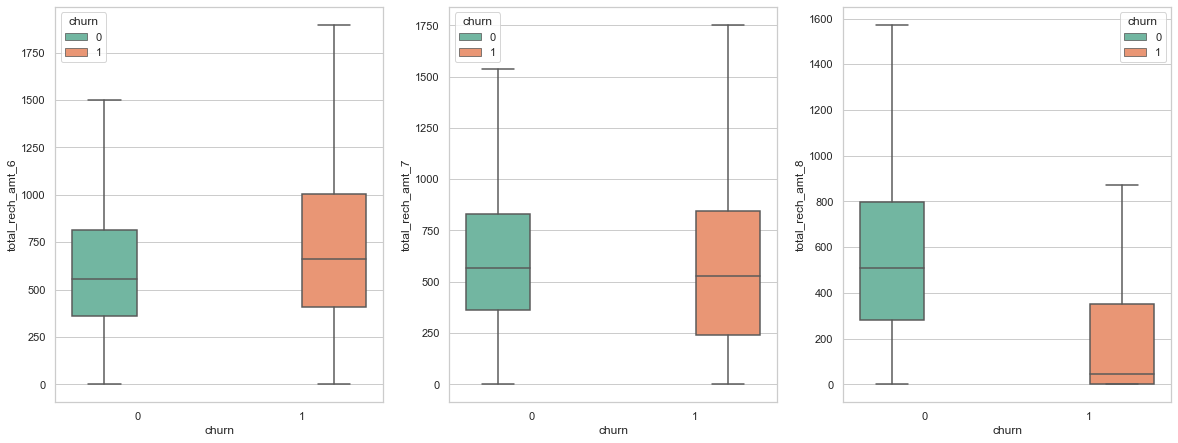

In [41]:
#Calling the function : Plotting total_rech_amt for 6,7,8th month
plot_box(hvc_data, 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8')

- The recharges made by churning customers show a downwards trend, as compared to non-churning customers

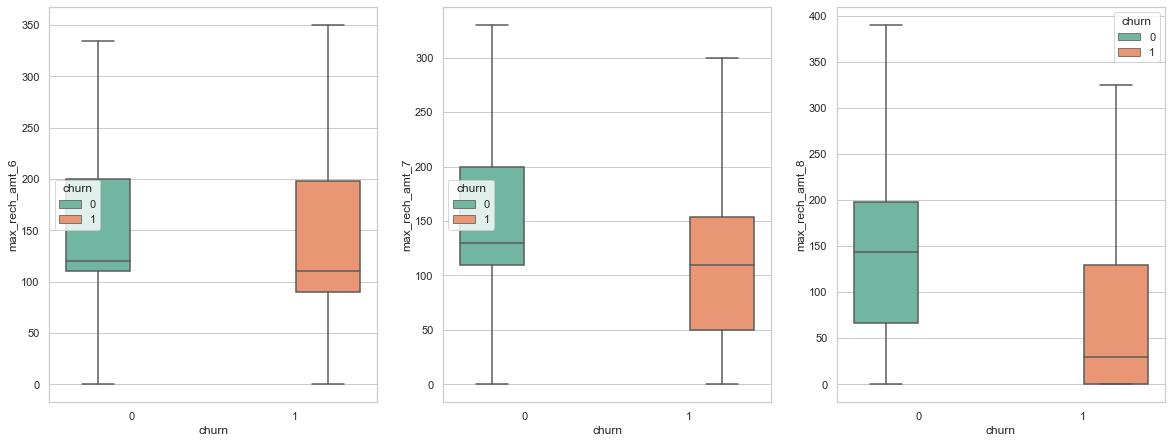

In [42]:
#Calling the function : Plotting last day recharge amount for 6,7,8th month
plot_box(hvc_data, 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8')

- It shows that the Maximum recharges made by the Customers is drecreasing.

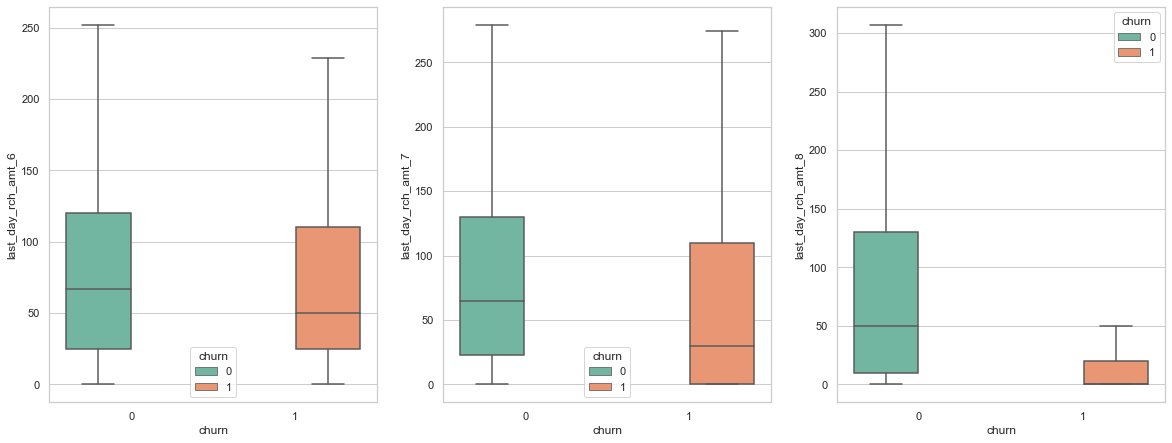

In [43]:
#Calling the function : Plotting max_rech_amt for 6,7,8th month
plot_box(hvc_data, 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8')

- Huge in the last day reach amount for churning Customers

In [44]:
#Lets find out column name with 2g & 3g
in_og_2g_3g_usage = hvc_data.columns[hvc_data.columns.str.contains('2g|3g',regex=True)]

In [45]:
# Saperating volume 2g-3g columns for later use
vol_2g3g = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6','vol_3g_mb_7', 'vol_3g_mb_8']

# Saperating monthly 2g-3g columns for later use
month_2g3g = ['monthly_2g_6', 'monthly_2g_7','monthly_2g_8','monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']

# Saperating volume based cost customer 2g-3g columns
vbc_2g3g = ['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

## Volume Based Churn

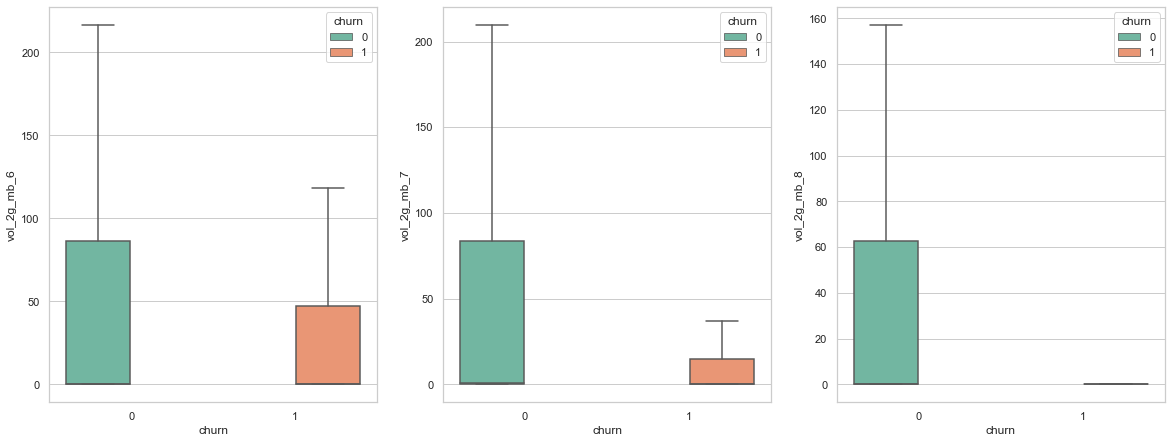

In [46]:
#Calling the function : Plotting volumne of 2G usgae for 6,7,8th month
plot_box(hvc_data, 'vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8')

- The Volume of usage of 2g data for the churning Customers issignificantly drecreasing as compared with the non-churn Customers

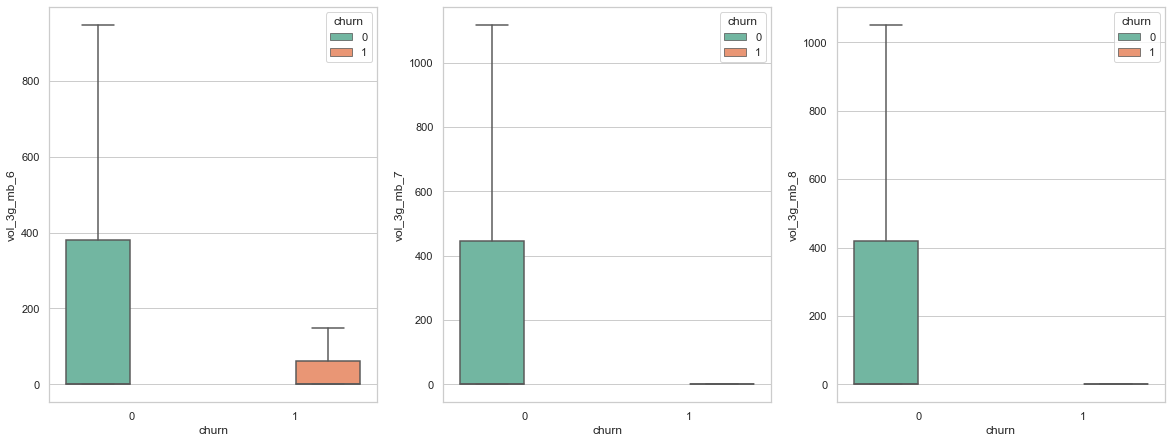

In [47]:
#Calling the function : Plotting volumne of 3G usgae for 6,7,8th month
plot_box(hvc_data, 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8')

- The Volume of usage of 3g data for the churning Customers issignificantly drecreasing as compared with the non-churn Customers

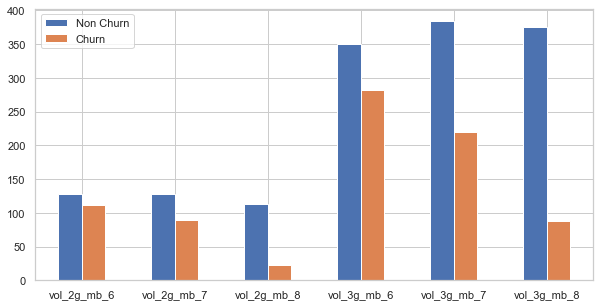

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Non Churn,127.83,128.23,113.24,349.83,383.55,374.88
Churn,111.75,89.74,23.15,281.41,219.45,87.40


In [48]:
#Lets see the mean value
mean_bar_chart(hvc_data,vol_2g3g)

- Mean volume for the non-churn Customers is greater than the churn customers for all months and for both, 2g and 3g data.


#### Monthly Data Usage

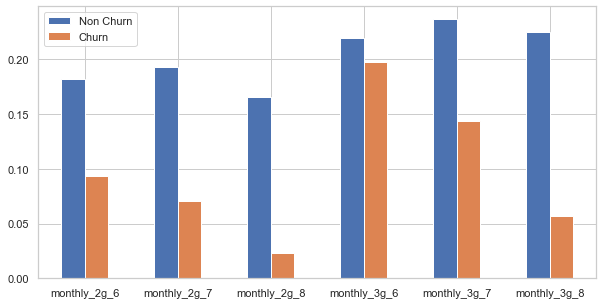

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.18,0.19,0.17,0.22,0.24,0.22
Churn,0.09,0.07,0.02,0.20,0.14,0.06


In [49]:
#Lets see the mean value
mean_bar_chart(hvc_data,month_2g3g)

As it can be observed fromm the above graph
- the monthly usage of both 2g/3g data is more in case of non-churn customers
- A downward trend in the monthly usage of data is observed for Customers that churn
- A relatively positive trend is observed for non-churn Customers

#### Volume based Cost

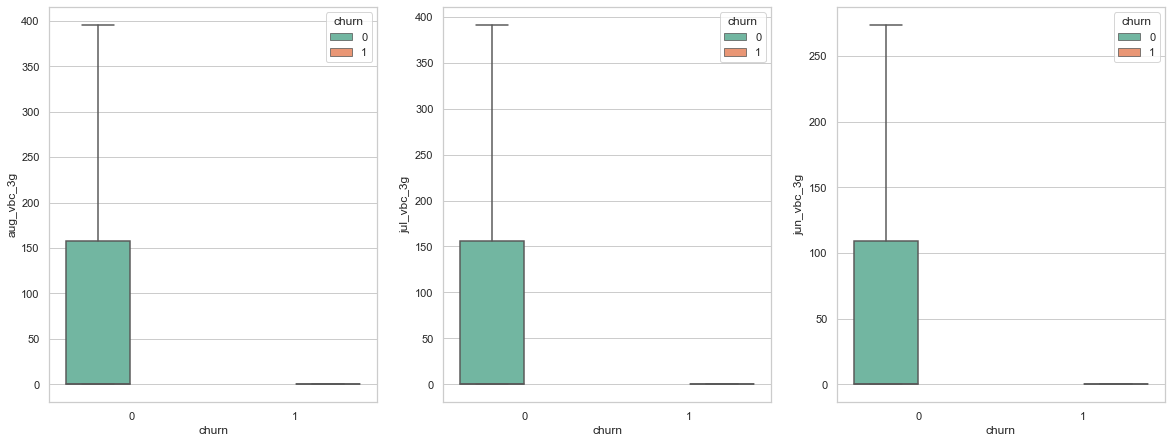

In [50]:
#Calling the function : Plotting vbc 3G usgae for 6,7,8th month
plot_box(hvc_data, 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g')

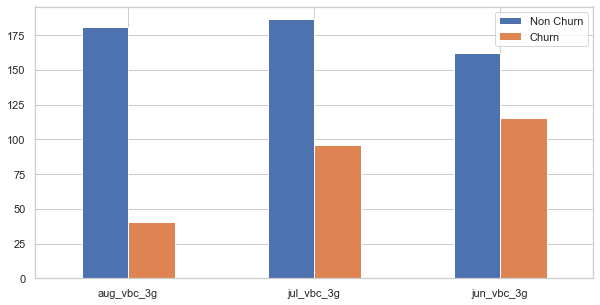

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
Non Churn,180.50,186.21,162.37
Churn,40.85,96.08,115.10


In [51]:
#Lets see the mean value
mean_bar_chart(hvc_data,vbc_2g3g)

- This shows significantly that volume-based costs for 3G are much lower for Churned customers compared to non-Churned customers and that vbc also drops in the 8th month

In [52]:
#Fetching column names if it contains 'mou'
min_cols = hvc_data.columns[hvc_data.columns.str.contains('mou')]
min_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

## Incoming and Outgoing usage analysis

In [53]:
#Lets find out column name with in, ic
in_ic = hvc_data.columns[hvc_data.columns.str.contains('in|ic',regex=True)]
in_ic

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'],
      dtype='object')

 #### Roaming incoming minutes of Usage

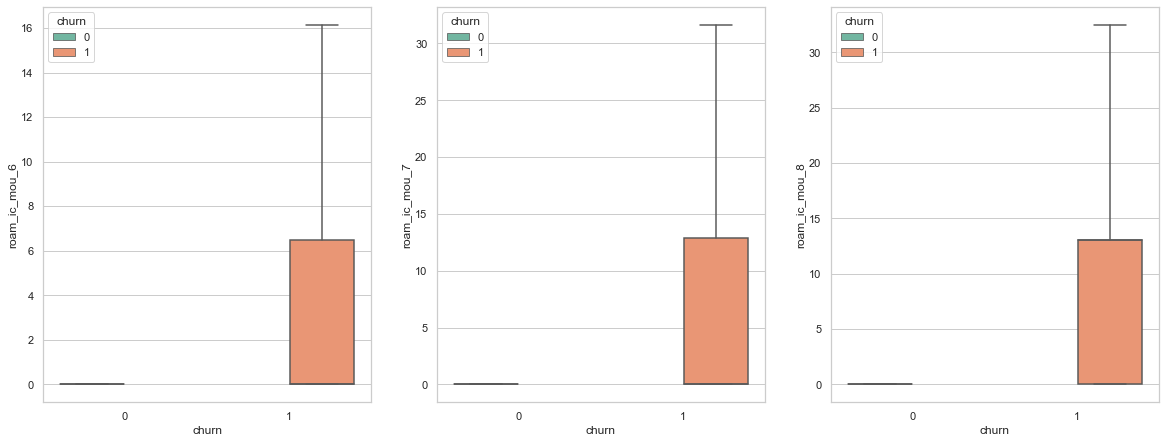

In [54]:
#Calling the function : Plotting Roaming Incoming Minutes of usage - voice calls for 6,7,8th month
plot_box(hvc_data, 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8')

- the roaming usage of has increased for the Churn Customers and this seems like a possible reason for churn.

####  Same mobile operator std- voice calls

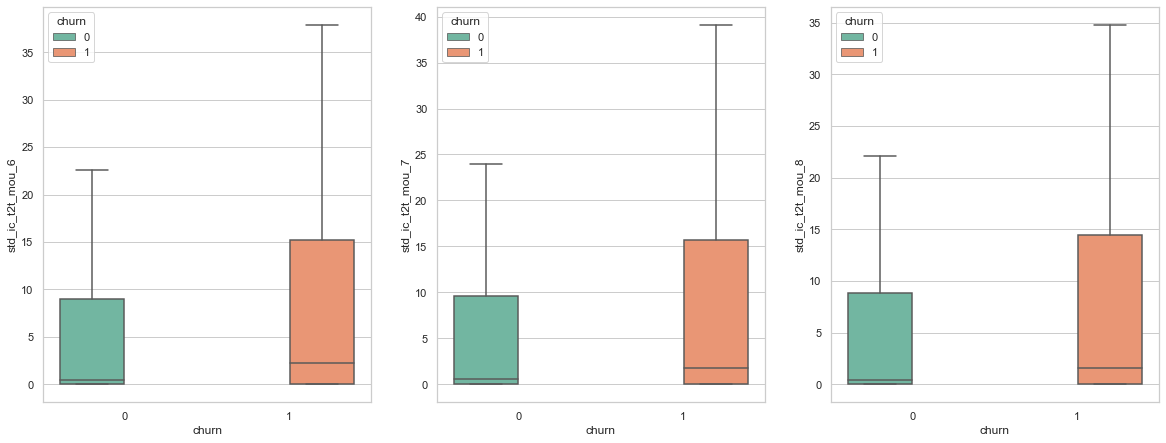

In [55]:
#Calling the function : Plotting for same mobile operator std- voice calls for 6,7,8th month
plot_box(hvc_data, 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7','std_ic_t2t_mou_8')

- As we can see for churned customers the mean volume is  decreasing in action phase.

#### Other Mobile Operators Standard Voice Call

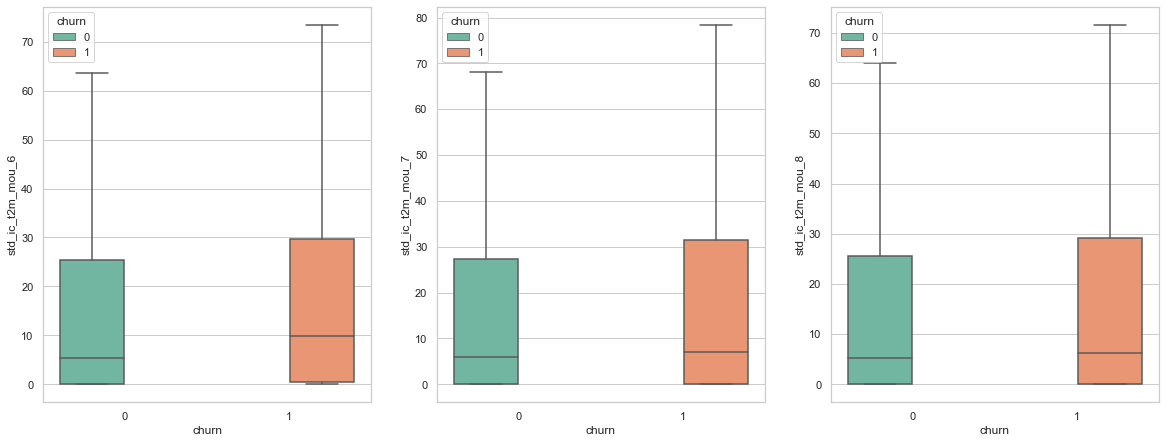

In [56]:
#Calling the function : Plotting other mobile operator std - voice calls for 6,7,8th month
plot_box(hvc_data, 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7','std_ic_t2m_mou_8')

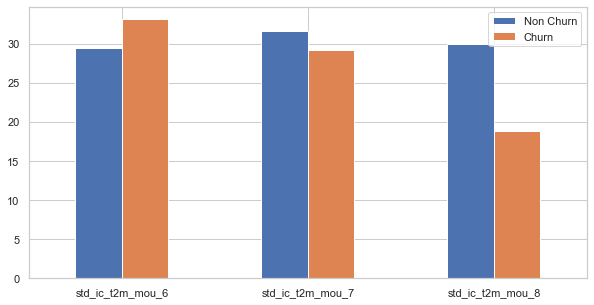

,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8
Non Churn,29.44,31.58,29.97
Churn,33.08,29.12,18.80


In [57]:
#Lets see the mean value
mean_bar_chart(hvc_data,['std_ic_t2m_mou_6', 'std_ic_t2m_mou_7','std_ic_t2m_mou_8'])

- For Churned Customers the Average Volume has Significantly drecreased in the Action Phase

#### Total Incoming Minutes of usage - voice calls

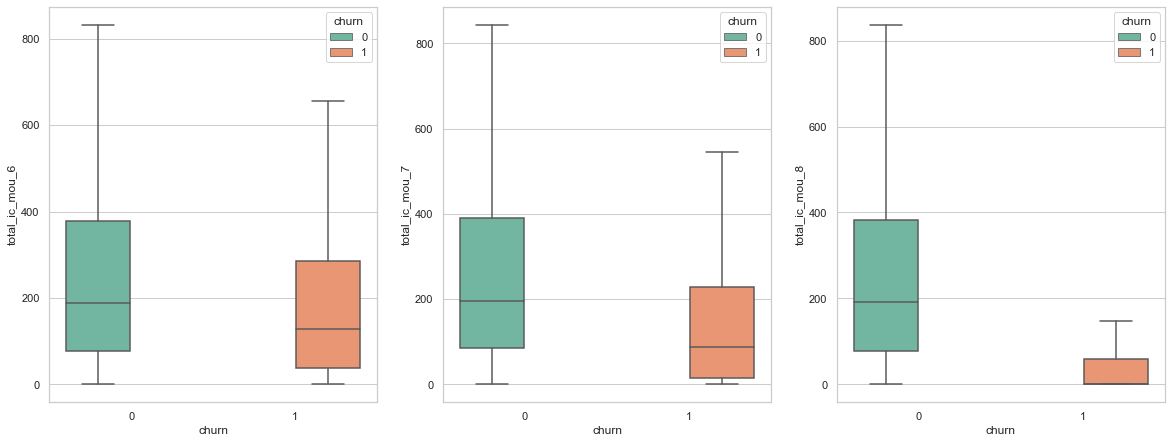

In [58]:
#Calling the function : Plotting for total Incoming Minutes of usage - voice calls for 6,7,8th month
plot_box(hvc_data,'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8')

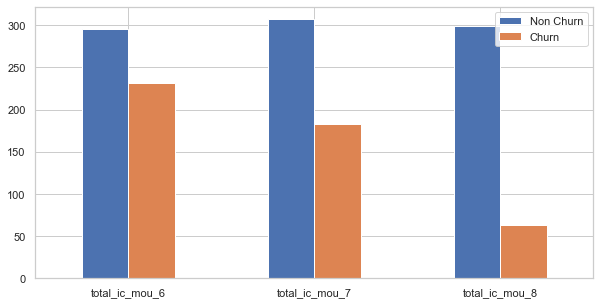

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
Non Churn,295.13,306.84,299.10
Churn,231.45,182.91,63.44


In [59]:
#Lets see the mean value
mean_bar_chart(hvc_data,['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8'])

- Total Incoming minutes of usage shows a Downward trend but has also significantly drecreased in the Action Phase

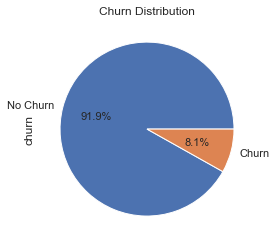

In [60]:
#Churn Distribution
ax = (hvc_data['churn'].value_counts()*100.0 /len(hvc_data)).plot.pie(autopct='%.1f%%', labels = ['No Churn', 'Churn'],figsize =(4,4), fontsize = 11)                                                                           

#Setting y label
#ax.set_ylabel('Churn',fontsize = 12)

#Setting Title
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

### Data Preparation for Modelling

#### Balancing the Data using SMOTE

- Around 92 per cent of customers are not churning in our data. The data is obviously skewed as we would expect a large majority of the customers not to churn.

In [61]:
#Initializing SMOTE
smote = SMOTE(random_state=0)
#Splitting data into X , y
X = hvc_data.drop('churn',axis=1)
y = hvc_data.churn

#### Splitting data into train and test set 

In [62]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [63]:
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


In [64]:
#Balancing data using SMOTE
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [65]:
y_smote.value_counts(normalize=True)

1   0.50
0   0.50
Name: churn, dtype: float64

#### Scaling Data :
We need to scale the data so that all our variables are be in the same range.

In [66]:
#Calling scaler method
scaler = MinMaxScaler()

In [67]:
#scaling train dataset
X_smote= scaler.fit_transform(X_smote)
# Scaling test data
X_test = scaler.transform(X_test)

### Model 1 :  Interpretable Model without PCA

### Random Forest Classification

In [68]:
#Applying random forest alogirthm and handling handling class imbalance
rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=24,
                                n_estimators=50,
                                max_features= 'auto',
                                criterion = 'gini',
                            class_weight='balanced')

In [69]:
#Fitting rf model
rf.fit(X_smote, y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=24,
                       n_estimators=50, n_jobs=-1)

### Model Evaluation

In [70]:
#Predictions
predictions = rf.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
#Confusion matrix
metrics.confusion_matrix(y_test, predictions)

array([[7515,  736],
       [ 215,  535]], dtype=int64)

In [72]:
#Classification_Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      8251
           1       0.42      0.71      0.53       750

    accuracy                           0.89      9001
   macro avg       0.70      0.81      0.73      9001
weighted avg       0.93      0.89      0.91      9001



In [73]:
#Accuracy score
metrics.accuracy_score(y_test,predictions)

0.8943450727696922

In [74]:
#Recall score
metrics.recall_score(y_test,predictions)

0.7133333333333334

### Model 2 :  High Performance Model with PCA - Dimentionality Reduction

In [75]:
#Building PCA model
pca = PCA(svd_solver='randomized', random_state=50)

In [76]:
#Fitting pca with x_train data
pca.fit(X_smote)

PCA(random_state=50, svd_solver='randomized')

In [77]:
#PCA components
pca.components_
pca_col = col
#Storing it to a dataframe
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':pca_col})
#TO see the first five row
pca_df.head()

,PC1,PC2,Feature
0,0.93,0.35,sep_vbc_3g
1,0.00,0.00,sep_vbc_3g
2,0.00,0.00,sep_vbc_3g
3,0.00,-0.01,sep_vbc_3g
4,-0.01,0.07,sep_vbc_3g


In [78]:
#Lets checkout the explained variance ratio
pca.explained_variance_ratio_

array([3.36902717e-01, 1.31865610e-01, 9.18271332e-02, 5.84072492e-02,
       4.04370878e-02, 3.40357550e-02, 3.28273096e-02, 2.31891486e-02,
       1.84005982e-02, 1.72479635e-02, 1.46735167e-02, 1.38154763e-02,
       1.12522026e-02, 1.03675274e-02, 9.21005963e-03, 8.57374200e-03,
       8.00918808e-03, 7.57125343e-03, 7.09009542e-03, 6.61232617e-03,
       6.14497766e-03, 5.76437965e-03, 5.52780691e-03, 5.28978392e-03,
       4.97833894e-03, 4.90374395e-03, 4.46791808e-03, 3.96264543e-03,
       3.75283295e-03, 3.54364903e-03, 3.41305312e-03, 3.26722206e-03,
       2.91724066e-03, 2.78676891e-03, 2.75870182e-03, 2.66305538e-03,
       2.34336664e-03, 2.23927296e-03, 2.07353339e-03, 2.06278312e-03,
       1.93213280e-03, 1.87597193e-03, 1.72264080e-03, 1.64323053e-03,
       1.63122955e-03, 1.47012336e-03, 1.44065507e-03, 1.42808055e-03,
       1.38472996e-03, 1.33725373e-03, 1.31150416e-03, 1.27228536e-03,
       1.25658369e-03, 1.19233196e-03, 1.14109597e-03, 1.09222422e-03,
      

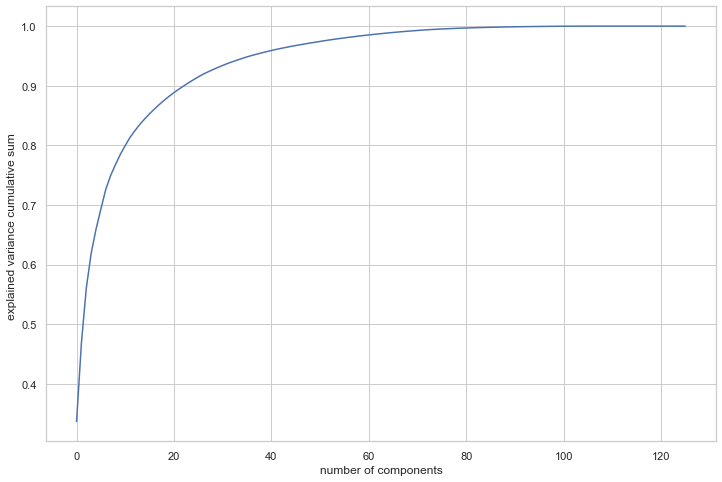

In [79]:
#Plotting pca.explained_variance_ratio_

#Setting fig size
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#X_label :number of components
plt.xlabel('number of components')
#Y_label : explained variance cumulative sum
plt.ylabel('explained variance cumulative sum ')
plt.show()

In [80]:
#Using incremental PCA 

#Now, applying Incremental PCA 
pca_final = IncrementalPCA(n_components=80)
#Fit Transforming train data
df_train_pca = pca_final.fit_transform(X_smote)
#Transforming test data
df_test_pca = pca_final.transform(X_test)

### 1. PCA with Random Forest

In [81]:
#Applying PCA with Random forest algorithm
pca_rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=24,
                                n_estimators=50,
                                max_features= 'auto',
                                criterion = 'gini',
                            class_weight='balanced')

In [82]:
#fitting model
pca_rf.fit(df_train_pca, y_smote)

RandomForestClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=24,
                       n_estimators=50, n_jobs=-1)

In [83]:
#Predictions
rf_predictions = pca_rf.predict(df_test_pca)

In [84]:
#Confusion Matrix
metrics.confusion_matrix(y_test, rf_predictions)

array([[6521, 1730],
       [ 246,  504]], dtype=int64)

In [85]:
#Cassification Report
print(metrics.classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      8251
           1       0.23      0.67      0.34       750

    accuracy                           0.78      9001
   macro avg       0.59      0.73      0.60      9001
weighted avg       0.90      0.78      0.82      9001



In [86]:
#Accuracy Score
metrics.accuracy_score(y_test,rf_predictions)

0.7804688367959116

In [87]:
#Recall score
metrics.recall_score(y_test,rf_predictions)

0.672

### 2. PCA with Logistic Regression

In [88]:
#Training the model on the train data
pca_logreg = LogisticRegression(class_weight ='balanced')
#Fitting the LR model
pca_logreg_model = pca_logreg.fit(df_train_pca,y_smote)

In [89]:
#Prediction on train data
y_train_pred_pca = pca_logreg_model.predict(df_train_pca)

In [90]:
## Model Evaluation

In [91]:
#Prediction on test data
y_test_pred_pca = pca_logreg_model.predict(df_test_pca)

In [92]:
#checking train Accuracy
metrics.accuracy_score(y_smote, y_train_pred_pca)

0.8683515459112331

In [93]:
#checking train recall
metrics.recall_score(y_smote, y_train_pred_pca)

0.8933139986534776

In [94]:
#checking test Accuracy
metrics.accuracy_score(y_test, y_test_pred_pca)

0.8435729363404066

In [95]:
#checking test Recall
metrics.recall_score(y_test, y_test_pred_pca)

0.78

### Insights :
- Out of all the above models . We see that the accuracy and recall of the model built by Logistic Regression with PCA is the best .<br>
 Hence considering this as our final model and check for further features

In [96]:
#checking confusion matrix
confusion_metric = metrics.confusion_matrix(y_test, y_test_pred_pca)
confusion_metric

array([[7008, 1243],
       [ 165,  585]], dtype=int64)

In [97]:
#Lets check all values of confusion matrix

TP = confusion_metric[1,1] # true positive 
TN = confusion_metric[0,0] # true negatives
FP = confusion_metric[0,1] # false positives
FN = confusion_metric[1,0] # false negatives

In [98]:
# checking for specificity
TN / float(TN+FP)

0.8493515937462126

In [99]:
# checking for  sensitivity 
TP / float(TP+FN)

0.78

### 3. XGBoost Model

In [100]:
# Hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', # accuracy
                        cv = folds, 
                        n_jobs = -1,
                        verbose = 1,
                        return_train_score=True)   

In [101]:
# fit the model
model_cv.fit(X_smote, y_smote)      

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[18:52:38] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [102]:
# cv results
cv_results_xboost = pd.DataFrame(model_cv.cv_results_)
cv_results_xboost['param_learning_rate'] = cv_results_xboost['param_learning_rate'].astype('float')

In [103]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy is  **'+str(round(model_cv.best_score_,2))+'** using '+str(model_cv.best_params_))

Accuracy is  **0.94** using {'learning_rate': 0.2, 'subsample': 0.4}


## Recommendation

- The company must focus on the Roaming calls . It is observed that customers with high Roaming calls are likely to Churn
- The company should analyse recharges and internet usage to track churning customers.
- The company must focus on the roaming , special and local call rates and add some offers to the packages or lower the rates.
- It would be helpful if the company would get a feedback from their customers and serve according to thier needs for better business.
- XGBoost with tuned hyperparameters produce best result on this dataset with 0.94 accuracy.
- As per our analysis XGBoost and Logistic Regression produce best accuracy and models can be selected to predict churn data for future dataset or production.